# Variational Autoencoder Example

This is part of the Udacity Deeplearning Nanodegree

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


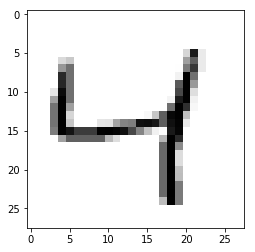

In [2]:

plt.imshow(
    mnist.train.images[2].reshape((28,28)),
    cmap='Greys'
)
plt.show()

In [22]:
dim1 = 64
dim2 = 32
image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, shape=[None, image_size])
targets = tf.placeholder(tf.float32, shape=[None, image_size])

encoder_layer_1 = tf.layers.dense(inputs, dim1, activation=tf.nn.relu)
encoder_layer_2 = tf.layers.dense(encoder_layer_1, dim2, activation=tf.nn.relu)
decoder_layer_1 = tf.layers.dense(encoder_layer_2, dim1, activation=tf.nn.relu)
logits = tf.layers.dense(decoder_layer_1, image_size, activation=None)

decoded = tf.nn.sigmoid(logits)

loss = tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits,
    labels=targets
)
cost = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [23]:
sess = tf.Session()
epochs = 50
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs: batch[0], targets: batch[0]}
        batch_cost, _ = sess.run([cost, optimizer], feed_dict=feed)

    print("Epoch: {}/{}...".format(e+1, epochs),
          "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/50... Training loss: 0.1678
Epoch: 2/50... Training loss: 0.1407
Epoch: 3/50... Training loss: 0.1248
Epoch: 4/50... Training loss: 0.1111
Epoch: 5/50... Training loss: 0.1096
Epoch: 6/50... Training loss: 0.1180
Epoch: 7/50... Training loss: 0.1045
Epoch: 8/50... Training loss: 0.1016
Epoch: 9/50... Training loss: 0.1047
Epoch: 10/50... Training loss: 0.0981
Epoch: 11/50... Training loss: 0.0977
Epoch: 12/50... Training loss: 0.1028
Epoch: 13/50... Training loss: 0.1006
Epoch: 14/50... Training loss: 0.0960
Epoch: 15/50... Training loss: 0.0967
Epoch: 16/50... Training loss: 0.0934
Epoch: 17/50... Training loss: 0.1015
Epoch: 18/50... Training loss: 0.0941
Epoch: 19/50... Training loss: 0.0954
Epoch: 20/50... Training loss: 0.0955
Epoch: 21/50... Training loss: 0.0979
Epoch: 22/50... Training loss: 0.0953
Epoch: 23/50... Training loss: 0.0974
Epoch: 24/50... Training loss: 0.0938
Epoch: 25/50... Training loss: 0.0956
Epoch: 26/50... Training loss: 0.0921
Epoch: 27/50... Train

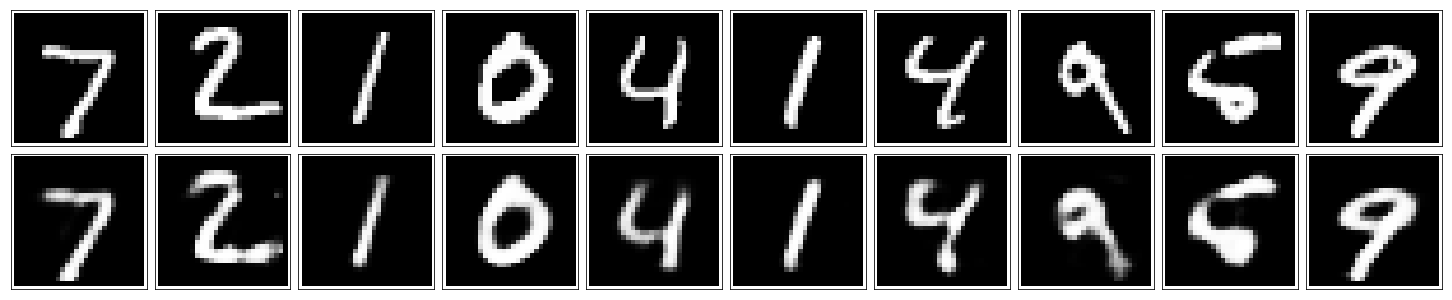

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoder_layer_1], feed_dict={inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

## Variational Autoencoder

In [31]:
dim1 = 64
dim2 = 32
image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, shape=[None, image_size])
targets = tf.placeholder(tf.float32, shape=[None, image_size])

encoder_layer_1 = tf.layers.dense(inputs, dim1, activation=tf.nn.relu)
encoder_layer_2_mu = tf.layers.dense(encoder_layer_1, dim2, activation=None)
encoder_layer_2_gamma = tf.layers.dense(encoder_layer_1, dim2, activation=None)
encoder_layer_2_sigma = tf.exp(0.5 * encoder_layer_2_gamma)

noise = tf.random_normal(tf.shape(encoder_layer_2_sigma), dtype=tf.float32)

encoder_layer_2 = encoder_layer_2_mu + encoder_layer_2_sigma*noise

decoder_layer_1 = tf.layers.dense(encoder_layer_2, dim1, activation=tf.nn.relu)

logits = tf.layers.dense(decoder_layer_1, image_size, activation=None)

decoded = tf.nn.sigmoid(logits)


reconstruction_loss = tf.reduce_sum(
    tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits,
    labels=targets
    )
)

latent_loss = tf.reduce_sum(
    tf.exp(encoder_layer_2_gamma) + tf.square(encoder_layer_2_mu) - 1 - encoder_layer_2_gamma
)

loss = reconstruction_loss + latent_loss

#cost = tf.reduce_mean(loss)
cost = loss
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [32]:
sess = tf.Session()
epochs = 50
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs: batch[0], targets: batch[0]}
        batch_cost, _ = sess.run([cost, optimizer], feed_dict=feed)

    print("Epoch: {}/{}...".format(e+1, epochs),
          "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/50... Training loss: 37577.3359
Epoch: 2/50... Training loss: 33164.8984
Epoch: 3/50... Training loss: 30962.4844
Epoch: 4/50... Training loss: 30356.5352
Epoch: 5/50... Training loss: 29598.8867
Epoch: 6/50... Training loss: 28623.4766
Epoch: 7/50... Training loss: 27733.5312
Epoch: 8/50... Training loss: 28413.6270
Epoch: 9/50... Training loss: 28343.7012
Epoch: 10/50... Training loss: 27347.7480
Epoch: 11/50... Training loss: 27422.4414
Epoch: 12/50... Training loss: 25957.9727
Epoch: 13/50... Training loss: 27196.7891
Epoch: 14/50... Training loss: 26872.0371
Epoch: 15/50... Training loss: 25714.9316
Epoch: 16/50... Training loss: 26762.9062
Epoch: 17/50... Training loss: 25864.4688
Epoch: 18/50... Training loss: 26920.1836
Epoch: 19/50... Training loss: 26221.9004
Epoch: 20/50... Training loss: 27092.6484
Epoch: 21/50... Training loss: 26871.3477
Epoch: 22/50... Training loss: 26550.5078
Epoch: 23/50... Training loss: 26172.9004
Epoch: 24/50... Training loss: 26839.3594
E

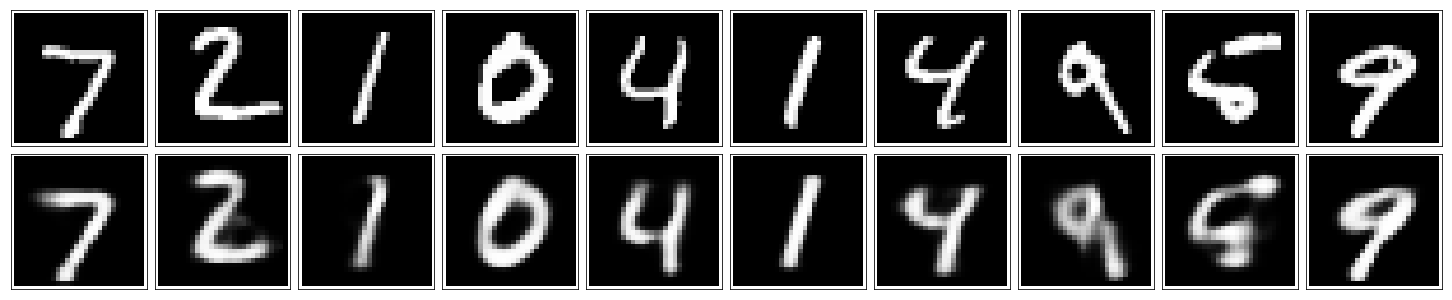

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoder_layer_1], feed_dict={inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

# Convolution Autoencoder

In [38]:
learning_rate = 0.001
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
targets_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])

### Encoder

conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 28x28x16

maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='SAME')
# Now 14x14x16

conv2 =  tf.layers.conv2d(maxpool1, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 14x14x8

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='SAME')
# Now 7x7x8

conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 7x7x8

encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='SAME')
# Now 4x4x8

### Decoder
upsample1 =  tf.image.resize_nearest_neighbor(encoded, (7,7))

# Now 7x7x8
conv4 =  tf.layers.conv2d(upsample1, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 7x7x8

upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8

conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 14x14x8

upsample3 = tf.image.resize_nearest_neighbor(conv4, (28,28))
# Now 28x28x8

conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='SAME', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss =  tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [39]:
sess = tf.Session()
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

    print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.1676
Epoch: 2/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1363
Epoch: 4/20... Training loss: 0.1277
Epoch: 5/20... Training loss: 0.1218
Epoch: 6/20... Training loss: 0.1222
Epoch: 7/20... Training loss: 0.1147
Epoch: 8/20... Training loss: 0.1143
Epoch: 9/20... Training loss: 0.1148
Epoch: 10/20... Training loss: 0.1116
Epoch: 11/20... Training loss: 0.1143
Epoch: 12/20... Training loss: 0.1091
Epoch: 13/20... Training loss: 0.1100
Epoch: 14/20... Training loss: 0.1131
Epoch: 15/20... Training loss: 0.1071
Epoch: 16/20... Training loss: 0.1083
Epoch: 17/20... Training loss: 0.1051
Epoch: 18/20... Training loss: 0.1099
Epoch: 19/20... Training loss: 0.1018
Epoch: 20/20... Training loss: 0.1091


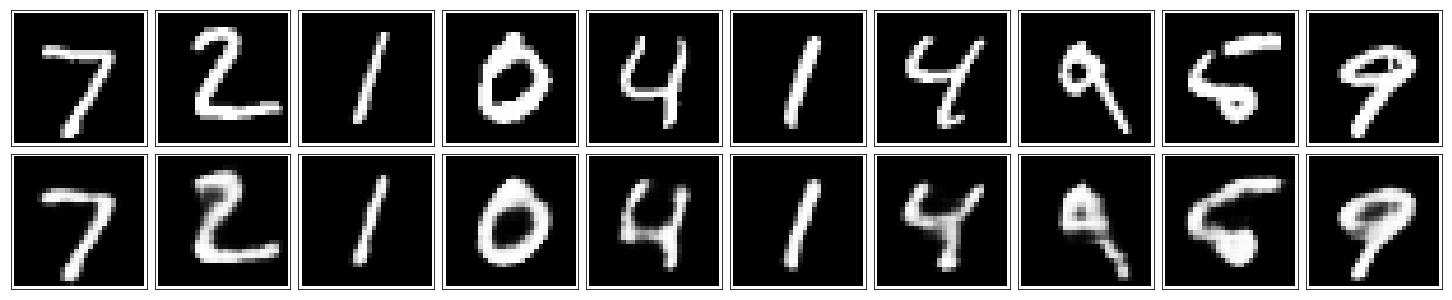

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [41]:
sess.close()

## Variational Convolution Autoencoding

In [45]:
learning_rate = 0.001
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
targets_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])

### Encoder

conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 28x28x16

maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='SAME')
# Now 14x14x16

conv2 =  tf.layers.conv2d(maxpool1, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 14x14x8

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='SAME')
# Now 7x7x8

conv3_mu = tf.layers.conv2d(maxpool2, 8, (3,3), padding='SAME', activation=None)
maxpool3_mu = tf.layers.max_pooling2d(conv3_mu, (2,2), (2,2), padding='SAME')

conv3_gamma = tf.layers.conv2d(maxpool2, 8, (3,3), padding='SAME', activation=None)
maxpool3_gamma = tf.layers.max_pooling2d(conv3_gamma, (2,2), (2,2), padding='SAME')
# Now 7x7x8

maxpool3_sigma = tf.exp(0.5 * maxpool3_gamma)

noise = tf.random_normal(tf.shape(maxpool3_sigma), dtype=tf.float32)

encoded = maxpool3_mu + maxpool3_sigma*noise
# Now 4x4x8

### Decoder
upsample1 =  tf.image.resize_nearest_neighbor(encoded, (7,7))

# Now 7x7x8
conv4 =  tf.layers.conv2d(upsample1, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 7x7x8

upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8

conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 14x14x8

upsample3 = tf.image.resize_nearest_neighbor(conv4, (28,28))
# Now 28x28x8

conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='SAME', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='SAME', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss =  tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
reconstruction_loss = tf.reduce_sum(
    tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits,
    labels=targets_
    )
)

latent_loss = tf.reduce_sum(
    tf.exp(maxpool3_gamma) + tf.square(maxpool3_mu) - 1 - maxpool3_gamma
)

loss = reconstruction_loss + latent_loss

cost = loss
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [46]:
sess = tf.Session()
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

    print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 47512.4258
Epoch: 2/20... Training loss: 45270.6641
Epoch: 3/20... Training loss: 41777.9453
Epoch: 4/20... Training loss: 40199.7109
Epoch: 5/20... Training loss: 39296.7109
Epoch: 6/20... Training loss: 37688.5508
Epoch: 7/20... Training loss: 38555.5156
Epoch: 8/20... Training loss: 38631.3086
Epoch: 9/20... Training loss: 38132.2734
Epoch: 10/20... Training loss: 37285.7812
Epoch: 11/20... Training loss: 37001.2617
Epoch: 12/20... Training loss: 36684.0156
Epoch: 13/20... Training loss: 37043.9609
Epoch: 14/20... Training loss: 36991.4688
Epoch: 15/20... Training loss: 36139.2891
Epoch: 16/20... Training loss: 37214.8125
Epoch: 17/20... Training loss: 35967.5781
Epoch: 18/20... Training loss: 36284.4648
Epoch: 19/20... Training loss: 36591.2461
Epoch: 20/20... Training loss: 36018.7266


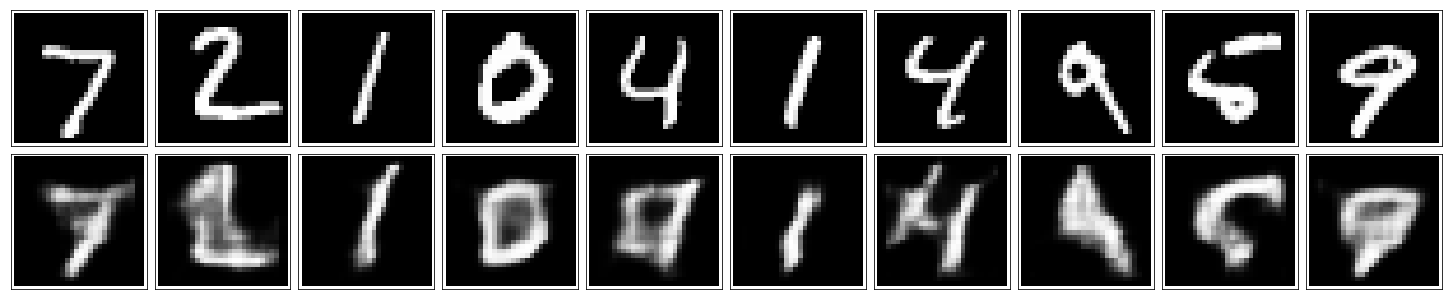

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)